In [1]:
import pandas as pd
import numpy as np


In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [4]:
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [5]:
star_wars.isnull().sum()

RespondentID                                                                                                                                       1
Have you seen any of the 6 films in the Star Wars franchise?                                                                                       0
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            350
Which of the following Star Wars films have you seen? Please select all that apply.                                                              513
Unnamed: 4                                                                                                                                       615
Unnamed: 5                                                                                                                                       636
Unnamed: 6                                                                                                

We can see above that row 0 where `RespondentID` is null is a meta information row and should be removed.

We can also see that there is quite a bit of null partly because of the structure of the data - checking movies that you saw. So we will need to process that in a different manner.

In [6]:
print(star_wars.shape) # before

star_wars = star_wars.loc[star_wars["RespondentID"].notnull()]

print(star_wars.shape) # after

(1187, 38)
(1186, 38)


In [7]:
star_wars.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


### Cleaning Yes/No Columns

Let's take a look at the next two columns:

* `Have you seen any of the 6 films in the Star Wars franchise?`
* `Do you consider yourself to be a fan of the Star Wars film franchise?`

Both represent a boolean answer (yes, no). They can also be `NaN` where a respondent chooses not to answer a question.

We also want to be convert these string fields to a boolean series. Booleans are much easier to work with for these types of data.

In [8]:
yes_no_cols = ['Have you seen any of the 6 films in the Star Wars franchise?'
        , 'Do you consider yourself to be a fan of the Star Wars film franchise?']

print(star_wars[yes_no_cols].dtypes)

Have you seen any of the 6 films in the Star Wars franchise?             object
Do you consider yourself to be a fan of the Star Wars film franchise?    object
dtype: object


In [9]:
yes_no = {
    "Yes": True,
    "No": False,
    np.NaN: False
}

for col in yes_no_cols:
    star_wars[col] = star_wars[col].map(yes_no)

In [10]:
print(star_wars[yes_no_cols].dtypes)

Have you seen any of the 6 films in the Star Wars franchise?             bool
Do you consider yourself to be a fan of the Star Wars film franchise?    bool
dtype: object


In [11]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [12]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts()

False    634
True     552
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [13]:
star_wars[yes_no_cols].isnull().sum()

Have you seen any of the 6 films in the Star Wars franchise?             0
Do you consider yourself to be a fan of the Star Wars film franchise?    0
dtype: int64

### Cleaning Checkbox Columns

The next six columns represent a single checkbox question: `Which of the following Star Wars films have you seen? Please select all that apply.`

Here is the mapping of the dataframe columns and checkbox values:

* `Which of the following Star Wars films have you seen? Please select all that apply.`: Whether respondent saw `Star Wars: Episode I The Phantom Menace`.

* `Unnamed: 4`: Whether respondent saw `Star Wars: Episode II Attack of the Clones`.

* `Unnamed: 5`: Whether respondent saw `Star Wars: Episode III Revenge of the Sith`.

* `Unnamed: 6`: Whether respondent saw `Star Wars: Episode IV A New Hope`.

* `Unnamed: 7`: Whether respondent saw `Star Wars: Episode V The Empire Strikes Back`

* `Unnamed: 8`: Whether respondent saw `Star Wars: Episode VI Return of the Jedi`

For each of the columns - if the value in a cell is the name of the movie - that means the respondent saw the movie. If the value is `NaN` - the respondent either did not answer or did not see the movie - we will assume they did not see the movie.

We want to convert each of these columns to Boolean type - `True` for saw movie and `False` for did not see movie.

We will need to create a mapping for each of these columns

In [14]:
# Check unique values to make sure the mapping is done correctly
checkbox_cols = star_wars.columns[3:9]

for col in checkbox_cols:
    print(col + " - ")
    print(star_wars[col].unique())

Which of the following Star Wars films have you seen? Please select all that apply. - 
['Star Wars: Episode I  The Phantom Menace' nan]
Unnamed: 4 - 
['Star Wars: Episode II  Attack of the Clones' nan]
Unnamed: 5 - 
['Star Wars: Episode III  Revenge of the Sith' nan]
Unnamed: 6 - 
['Star Wars: Episode IV  A New Hope' nan]
Unnamed: 7 - 
['Star Wars: Episode V The Empire Strikes Back' nan]
Unnamed: 8 - 
['Star Wars: Episode VI Return of the Jedi' nan]


In [15]:
# Mapping dictionary
checkbox_map_arr = [
    {
        'Star Wars: Episode I  The Phantom Menace': True,
        np.NaN: False
    },
    {
        'Star Wars: Episode II  Attack of the Clones': True,
        np.NaN: False
    },
    {
        'Star Wars: Episode III  Revenge of the Sith': True,
        np.NaN: False
    }, 
    {
        'Star Wars: Episode IV  A New Hope': True,
        np.NaN: False
    },
    {
        'Star Wars: Episode V The Empire Strikes Back': True,
        np.NaN: False
    },
    {
        'Star Wars: Episode VI Return of the Jedi': True,
        np.NaN: False
    }
]

In [16]:
# Map values:
for index in range(0, 6):
    star_wars[checkbox_cols[index]] = star_wars[checkbox_cols[index]].map(checkbox_map_arr[index])

In [17]:
# Check unique values to make sure the mapping is done correctly
checkbox_cols = star_wars.columns[3:9]

for col in checkbox_cols:
    print(col + " - ")
    print(star_wars[col].unique())

Which of the following Star Wars films have you seen? Please select all that apply. - 
[ True False]
Unnamed: 4 - 
[ True False]
Unnamed: 5 - 
[ True False]
Unnamed: 6 - 
[ True False]
Unnamed: 7 - 
[ True False]
Unnamed: 8 - 
[ True False]


In [18]:
# Rename columns
seen_cols_mapping = {
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'episode_1_seen',
    'Unnamed: 4': 'episode_2_seen',
    'Unnamed: 5': 'episode_3_seen',
    'Unnamed: 6': 'episode_4_seen',
    'Unnamed: 7': 'episode_5_seen',
    'Unnamed: 8': 'episode_6_seen',
}

star_wars.rename(columns=seen_cols_mapping, inplace=True)

### Cleaning the Ranking Columns

The next six columns ask the respondents to rank the movies in order of least to favorite. Each of the columns can contain: `1`, `2`, `3`, `4`, `5`, `6`, `NaN`.

* `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked `Star Wars: Episode I The Phantom Menace`
* `Unnamed: 10` - How much the respondent liked `Star Wars: Episode II Attack of the Clones`
* `Unnamed: 11` - How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
* `Unnamed: 12` - How much the respondent liked `Star Wars: Episode IV A New Hope`
* `Unnamed: 13` - How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
* `Unnamed: 14` - How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

In [19]:
rank_cols = star_wars.columns[9:15]

In [20]:
# Convert to float first
star_wars[rank_cols] = star_wars[rank_cols].astype(float)

In [21]:
# Rename columns
rank_cols_mapping = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'episode_1_ranking',
    'Unnamed: 10': 'episode_2_ranking',
    'Unnamed: 11': 'episode_3_ranking',
    'Unnamed: 12': 'episode_4_ranking',
    'Unnamed: 13': 'episode_5_ranking',
    'Unnamed: 14': 'episode_6_ranking',
}

star_wars.rename(columns=rank_cols_mapping, inplace=True)

In [22]:
star_wars.columns[9:15]

Index(['episode_1_ranking', 'episode_2_ranking', 'episode_3_ranking',
       'episode_4_ranking', 'episode_5_ranking', 'episode_6_ranking'],
      dtype='object')

### Find the Highest-Ranked Movie

In [23]:
highest_rank_movie = star_wars[star_wars.columns[9:15]].mean()

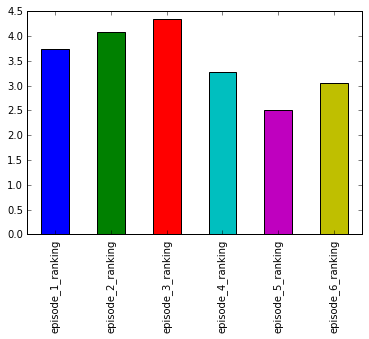

In [24]:
%matplotlib inline
highest_rank_movie.plot(kind='bar')


The lower the value - the more the movie was liked by the respondent.

In this case, Episode 5 of the Star Wars series (Empire Strikes Back) was respondents favorite.

### Most Viewed Movie

In [25]:
seen = star_wars[star_wars.columns[3:9]].sum()

In [26]:
seen

episode_1_seen    673
episode_2_seen    571
episode_3_seen    550
episode_4_seen    607
episode_5_seen    758
episode_6_seen    738
dtype: int64

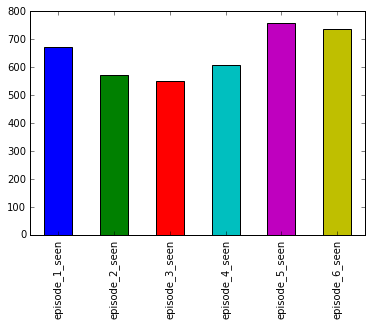

In [27]:
seen.plot(kind = 'bar')

Episode five was the most watched star wars film

### Exploring Gender Segments

Let's look into:

* `Do you consider yourself to be a fan of the Star Wars film franchise?` - True or False
* `Do you consider yourself to be a fan of the Star Trek franchise?` - Yes or no
* `Gender` - Male or Female

In [28]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

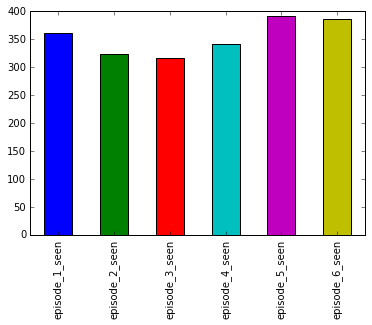

In [30]:
males_seen = males[males.columns[3:9]].sum()
males_seen.plot(kind = 'bar')

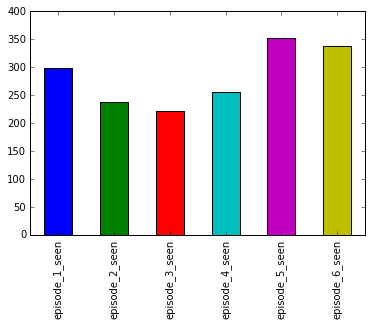

In [31]:
females_seen = females[males.columns[3:9]].sum()
females_seen.plot(kind = 'bar')

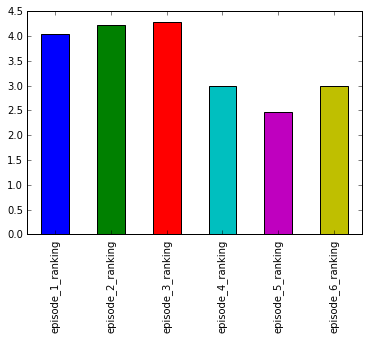

In [32]:
male_highest_rank_movie = males[males.columns[9:15]].mean()
male_highest_rank_movie.plot(kind='bar')


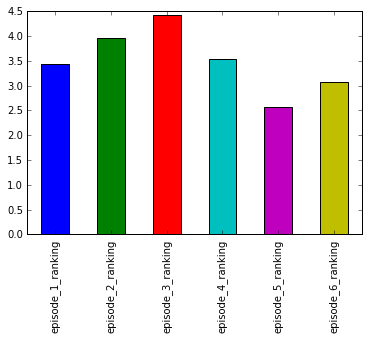

In [33]:
female_highest_rank_movie = females[males.columns[9:15]].mean()
female_highest_rank_movie.plot(kind='bar')


When cut by `Gender`, we can see that episode 5 was consistently the most viewed and highest ranked for both genders showing that episode 5 was universally liked across both groups.